# Web Scraping: Scrape Unsplash Web Site for Image Urls with Beautiful Soup

### Importing modules

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [38]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

### Settings

In [194]:
wallpaper_types = ['screen/4k', 'iphone', 'cool', 'cute', 'screen/live', 'desktop/pc', 'colors/black', 'iphone/ipad', 'desktop']

categories_dict = {
    'none': None,
    'profile': ['D1hjc'],
    'mobile': ['YVj9w'],
    'mobile-2': ['YVj9w', 'f27ne'],
    'landscape': ['YVj9w', 'ht4YT']
}

url = 'https://unsplash.com/'

## Scraping

In [275]:
img_dfs = {}
for wallpaper_type in wallpaper_types:
    response = requests.get( url + 'wallpapers/' + wallpaper_type)
    html_text = response.text
    soupObj = BeautifulSoup(html_text, 'html.parser')
    imgs = soupObj.find_all('img')

    img_table = []
    for img in imgs:
        img_table.append([img.get('class'), img.get('src').split('?')[0]])

    img_df = pd.DataFrame(img_table, columns=['classes', 'uri'])
    img_df['type'] = np.nan
    for i in img_df.index:
        for key in categories_dict.keys():
            if img_df.loc[i, 'classes'] == categories_dict[key]:
                img_df.loc[i, 'type'] = key
   
    img_df['category'] = wallpaper_type
    img_dfs[wallpaper_type] = img_df.copy()
    
global_ctgrs = []
for key in img_dfs.keys():
    global_ctgrs += list(np.unique(img_dfs[key]['classes'].dropna()))
global_ctgrs = np.unique(global_ctgrs)
print('Categories found: ' + str(len(global_ctgrs)) + '\n' + str(global_ctgrs))

imgs_df = pd.concat([img_dfs[key] for key in img_dfs.keys()], 0).reset_index(drop=True)
imgs_df_clean = imgs_df[imgs_df['type']!='none']
imgs_df_clean['id'] = ['img-' + str(i) for i in imgs_df_clean.index]

Categories found: 4
[list(['D1hjc']) list(['YVj9w']) list(['YVj9w', 'f27ne'])
 list(['YVj9w', 'ht4YT'])]


C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## Saving Scraped Images 

#### As csv file

In [277]:
#imgs_df_clean.to_csv('data/unsplash_imgs.csv', index=False)

In [4]:
imgs_clean = pd.read_csv('data/unsplash_imgs.csv')

In [40]:
imgs_clean.head()

,classes,uri,type,category,id
0,"['YVj9w', 'ht4YT']",https://media.istockphoto.com/photos/space-background-wiht-stars-stock-image-picture-id1287901429,landscape,screen/4k,img-0
1,"['YVj9w', 'ht4YT']",https://media.istockphoto.com/photos/abstract-background-wallpaper-picture-id952039286,landscape,screen/4k,img-1
2,"['YVj9w', 'ht4YT']",https://media.istockphoto.com/photos/digital-eye-wave-lines-stock-background-stock-video-picture-id1226241649,landscape,screen/4k,img-2
3,"['YVj9w', 'ht4YT']",https://media.istockphoto.com/photos/abstract-technology-blue-spotlight-backgrounds-loopable-elements-4k-picture-id1174989484,landscape,screen/4k,img-3
4,"['YVj9w', 'ht4YT']",https://media.istockphoto.com/photos/space-background-wiht-stars-stock-image-picture-id1287901429,landscape,screen/4k,img-4


#### As json file

In [25]:
imgs_list = []
for i in imgs_clean.index:
    imgs_list.append({col: imgs_clean.loc[i, col] for col in imgs_clean.columns})

In [26]:
imgs_json = json.dumps(imgs_list, sort_keys=True, indent=4)

In [27]:
open('data/unsplash_imgs.json', 'w').write(imgs_json)

218392

#### As JavaScript File

In [28]:
open('data/unsplash_imgs.js', 'w').write('export default const Imgs = ' + imgs_json)

218420

# Exploratory Data Analysis

In [256]:
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep'
)

### Image count per category

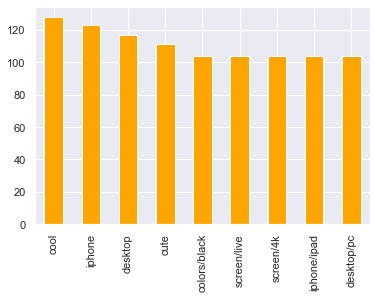

In [257]:
imgs_clean['category'].value_counts().plot.bar(color='orange')

### Image proportion per type and category

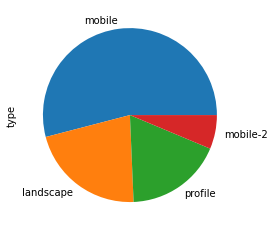

In [5]:
imgs_clean['type'].value_counts().plot.pie()

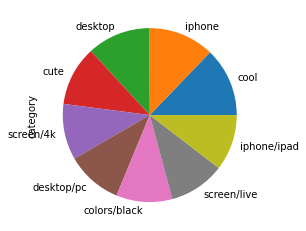

In [6]:
imgs_clean['category'].value_counts().plot.pie()

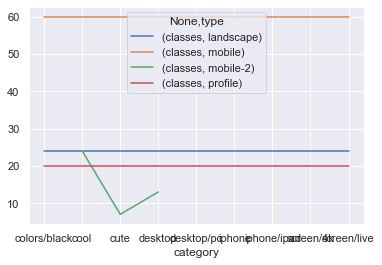

In [259]:
imgs_clean.groupby(['category', 'type']).count()['classes'].to_frame().unstack(1).plot()

## Extra: Saving color name and hexadecimal notation list as json file from string

#### Colors as string

In [9]:
colors_str = '''aliceblue (`#f0f8ff`)
antiquewhite (`#faebd7`)
aqua (`#00ffff`)
aquamarine (`#7fffd4`)
azure (`#f0ffff`)
beige (`#f5f5dc`)
bisque (`#ffe4c4`)
black (`#000000`)
blanchedalmond (`#ffebcd`)
blue (`#0000ff`)
blueviolet (`#8a2be2`)
brown (`#a52a2a`)
burlywood (`#deb887`)
cadetblue (`#5f9ea0`)
chartreuse (`#7fff00`)
chocolate (`#d2691e`)
coral (`#ff7f50`)
cornflowerblue (`#6495ed`)
cornsilk (`#fff8dc`)
crimson (`#dc143c`)
cyan (`#00ffff`)
darkblue (`#00008b`)
darkcyan (`#008b8b`)
darkgoldenrod (`#b8860b`)
darkgray (`#a9a9a9`)
darkgreen (`#006400`)
darkgrey (`#a9a9a9`)
darkkhaki (`#bdb76b`)
darkmagenta (`#8b008b`)
darkolivegreen (`#556b2f`)
darkorange (`#ff8c00`)
darkorchid (`#9932cc`)
darkred (`#8b0000`)
darksalmon (`#e9967a`)
darkseagreen (`#8fbc8f`)
darkslateblue (`#483d8b`)
darkslategrey (`#2f4f4f`)
darkturquoise (`#00ced1`)
darkviolet (`#9400d3`)
deeppink (`#ff1493`)
deepskyblue (`#00bfff`)
dimgray (`#696969`)
dimgrey (`#696969`)
dodgerblue (`#1e90ff`)
firebrick (`#b22222`)
floralwhite (`#fffaf0`)
forestgreen (`#228b22`)
fuchsia (`#ff00ff`)
gainsboro (`#dcdcdc`)
ghostwhite (`#f8f8ff`)
gold (`#ffd700`)
goldenrod (`#daa520`)
gray (`#808080`)
green (`#008000`)
greenyellow (`#adff2f`)
grey (`#808080`)
honeydew (`#f0fff0`)
hotpink (`#ff69b4`)
indianred (`#cd5c5c`)
indigo (`#4b0082`)
ivory (`#fffff0`)
khaki (`#f0e68c`)
lavender (`#e6e6fa`)
lavenderblush (`#fff0f5`)
lawngreen (`#7cfc00`)
lemonchiffon (`#fffacd`)
lightblue (`#add8e6`)
lightcoral (`#f08080`)
lightcyan (`#e0ffff`)
lightgoldenrodyellow (`#fafad2`)
lightgray (`#d3d3d3`)
lightgreen (`#90ee90`)
lightgrey (`#d3d3d3`)
lightpink (`#ffb6c1`)
lightsalmon (`#ffa07a`)
lightseagreen (`#20b2aa`)
lightskyblue (`#87cefa`)
lightslategrey (`#778899`)
lightsteelblue (`#b0c4de`)
lightyellow (`#ffffe0`)
lime (`#00ff00`)
limegreen (`#32cd32`)
linen (`#faf0e6`)
magenta (`#ff00ff`)
maroon (`#800000`)
mediumaquamarine (`#66cdaa`)
mediumblue (`#0000cd`)
mediumorchid (`#ba55d3`)
mediumpurple (`#9370db`)
mediumseagreen (`#3cb371`)
mediumslateblue (`#7b68ee`)
mediumspringgreen (`#00fa9a`)
mediumturquoise (`#48d1cc`)
mediumvioletred (`#c71585`)
midnightblue (`#191970`)
mintcream (`#f5fffa`)
mistyrose (`#ffe4e1`)
moccasin (`#ffe4b5`)
navajowhite (`#ffdead`)
navy (`#000080`)
oldlace (`#fdf5e6`)
olive (`#808000`)
olivedrab (`#6b8e23`)
orange (`#ffa500`)
orangered (`#ff4500`)
orchid (`#da70d6`)
palegoldenrod (`#eee8aa`)
palegreen (`#98fb98`)
paleturquoise (`#afeeee`)
palevioletred (`#db7093`)
papayawhip (`#ffefd5`)
peachpuff (`#ffdab9`)
peru (`#cd853f`)
pink (`#ffc0cb`)
plum (`#dda0dd`)
powderblue (`#b0e0e6`)
purple (`#800080`)
rebeccapurple (`#663399`)
red (`#ff0000`)
rosybrown (`#bc8f8f`)
royalblue (`#4169e1`)
saddlebrown (`#8b4513`)
salmon (`#fa8072`)
sandybrown (`#f4a460`)
seagreen (`#2e8b57`)
seashell (`#fff5ee`)
sienna (`#a0522d`)
silver (`#c0c0c0`)
skyblue (`#87ceeb`)
slateblue (`#6a5acd`)
slategray (`#708090`)
snow (`#fffafa`)
springgreen (`#00ff7f`)
steelblue (`#4682b4`)
tan (`#d2b48c`)
teal (`#008080`)
thistle (`#d8bfd8`)
tomato (`#ff6347`)
turquoise (`#40e0d0`)
violet (`#ee82ee`)
wheat (`#f5deb3`)
white (`#ffffff`)
whitesmoke (`#f5f5f5`)
yellow (`#ffff00`)
yellowgreen (`#9acd32`)'''

#### Processing colors string

In [26]:
color_lst_str = json.dumps([item.split(' ')[0] for item in colors_str.split('\n')], indent=4)
hex_color_lst_str = json.dumps([item.split(' ')[1].split('`')[1] for item in colors_str.split('\n')], indent=4)

#### Saving color lists as json

In [27]:
#open('data/colorList.json', 'w').write(color_lst_str)
#open('data/hexColorList.json', 'w').write(hex_color_lst_str)

2177

#### Printing result

In [30]:
print(color_lst_str[:99])

[
    "aliceblue",
    "antiquewhite",
    "aqua",
    "aquamarine",
    "azure",
    "beige",
    


In [29]:
print(hex_color_lst_str[:100])

[
    "#f0f8ff",
    "#faebd7",
    "#00ffff",
    "#7fffd4",
    "#f0ffff",
    "#f5f5dc",
    "#ff
